# Clustering with K-Means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('clusteringkmeans.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


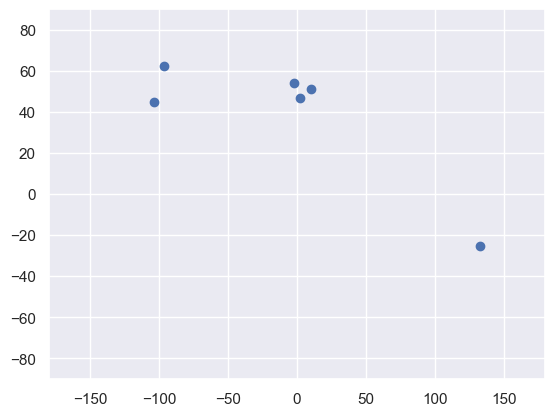

In [8]:
plt.scatter(data['Longitude'], data['Latitude'])
# set axis so they match the actual domain of longitude and latitude values
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [43]:
data_mapped = data.copy()
# transform categorical data
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French': 1, 'German': 2})
# select only latitude, longitude and language features
x = data_mapped.iloc[:,1:4] 
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [99]:
# Kmeans clustering, compute WCSS for each number of clusters from 2 to 6
wcss=[]
all_kmeans={}

for i in range(2,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    all_kmeans[i] = kmeans
    wcss.append(kmeans.inertia_)

wcss

[13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

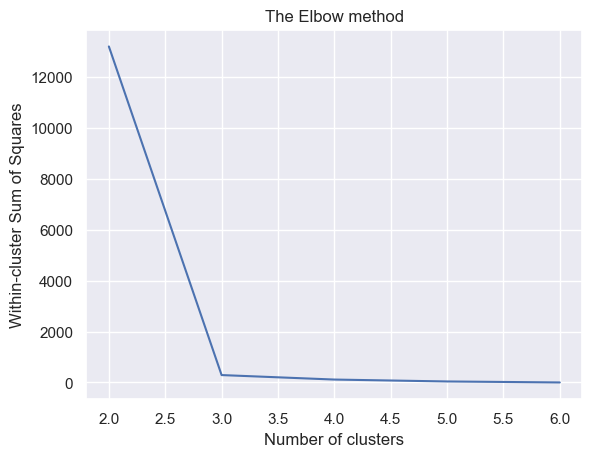

In [100]:
# Elbow method: compare WCSS for each number of clusters
plt.plot(range(2,7), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
# we can see the optimal number of cluster at the elbow is 3 since it stops decreasing
optimal_clusters_nbr = 3

In [101]:
# Predict clusters
identified_clusters = all_kmeans[optimal_clusters_nbr].fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


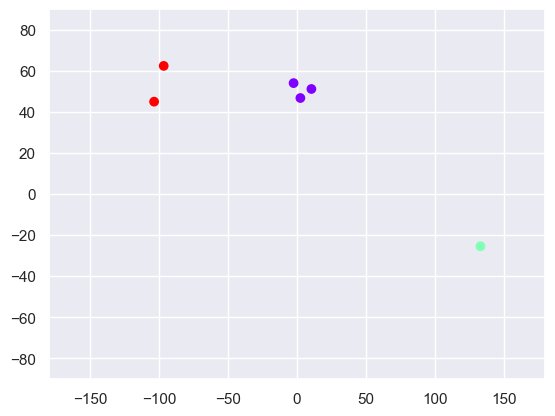

In [102]:
# Show predicted clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
# set axis so they match the actual domain of longitude and latitude values
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()